# Métricas de Avaliação de Modelos de Classificação

In [11]:
#imports necessários
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #esta linha é particularmente importante neste notebook!!!

In [12]:
# Criar um conjunto de dados de exemplo (não precisa conhecer esta linha de código!!!)
# Serve apenas para gerarmos um conjunto de 1000 dados com 20 features e definir X e y
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora, vamos treinar um modelo de classificação simples, como a Regressão Logística:

In [13]:
# Treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

Se você chegou até aqui, significa que você treinou um modelo de regressão logística (machine learning) e o passo seguinte é verificar se esse modelo é razoável ou não. Para isso, você precisa de métricas bem definidas que te ajudem a estudar a capacidade preditiva deste modelo. De uma forma geral, você quer um modelo que acerte muitos dos casos de teste e que ao mesmo tempo erre de maneira equilibrada os diferentes casos possíveis. Existem muitas métricas viáveis para avaliar a capacidade de modelos preditivos de classificação, mas até o momento, para nós, essas métricas são:


1.   Acurácia
2.   Matriz de Confusão
3.   Classification Report


Vamos discutir cada uma em separado para entendermos um pouco mais os detalhes.

# Accuracy Score:

A pontuação de precisão (accuracy score) é uma métrica simples que mede a proporção de previsões corretas feitas pelo modelo. É a razão entre o número de previsões corretas e o número total de previsões, ou seja, a porcentagem de acertos.

In [14]:
# Calcular a accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.855


A acurácia, por si só, não é suficiente para verificar a capacidade preditiva de um modelo de classificação em muitos casos, especialmente quando os dados são desbalanceados ou quando as classes têm diferentes custos associados a erros de classificação. Existem várias razões pelas quais a acurácia isoladamente pode ser enganosa ou inadequada:

1. **Desbalanceamento de Classes**: Em problemas em que as classes são
desequilibradas, ou seja, uma classe tem muito mais exemplos do que a outra, a acurácia pode ser enganosa. O modelo pode atingir uma alta acurácia simplesmente prevendo a classe majoritária em quase todos os casos, enquanto falha em identificar a classe minoritária. Nesse caso, a acurácia não reflete a capacidade do modelo de identificar corretamente as amostras da classe minoritária.

2. **Custo dos Erros**: Em muitos cenários, cometer um tipo específico de erro pode ser mais crítico do que outro. Por exemplo, em diagnósticos médicos, um falso negativo (não diagnosticar uma doença quando ela está presente) pode ter consequências mais graves do que um falso positivo (diagnosticar erroneamente uma doença). A acurácia não leva em consideração o custo associado a diferentes tipos de erros.

3. **Contexto do Problema**: A escolha de métricas de avaliação deve ser guiada pelo contexto do problema. O que é mais importante: minimizar falsos positivos, minimizar falsos negativos, encontrar um equilíbrio entre ambos ou otimizar para outra métrica específica? A acurácia não leva em consideração as nuances do problema.

4. **Métricas Personalizadas**: Em alguns casos, métricas personalizadas podem ser mais relevantes do que a acurácia. Por exemplo, em aplicações de detecção de fraudes, você pode criar uma métrica personalizada que leve em consideração o impacto financeiro dos erros de classificação.

Portanto, a acurácia é uma métrica valiosa, mas não deve ser usada isoladamente. É importante considerar métricas adicionais que se alinhem com os objetivos e as peculiaridades do problema de classificação em questão, especialmente quando há desequilíbrio de classes ou custos desiguais associados a diferentes tipos de erros. Essas métricas proporcionarão uma compreensão mais completa do desempenho do modelo. A seguir vamos entender como a matriz de confusão pode ajudar neste processo.






# Matriz de Confusão:

## O que é:
Matriz de confusão é uma visualização tabular dos rótulos da verdade versus previsões do modelo. Cada linha da matriz de confusão representa as instâncias de uma classe prevista e cada coluna representa as instâncias de uma classe real. A Matriz de Confusão não é exatamente uma métrica de desempenho, mas uma espécie de base sobre a qual outras métricas avaliam os resultados.

## Como calcular?

In [15]:
# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)


Matriz de Confusão:
[[85  8]
 [21 86]]


## Como interpretar?

Essa matriz é comumente usada para avaliar o desempenho de um modelo de classificação binária. Vamos interpretar os resultados com base nos valores apresentados:

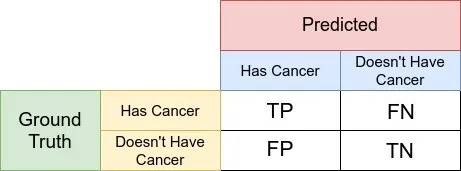

A classe positiva é representada como "1" ou "verdadeira", e a classe negativa é representada como "0" ou "falsa".
Os valores nas células da matriz representam a contagem de amostras que se enquadram em cada categoria.
A interpretação dos resultados é a seguinte:

1. Verdadeiros Positivos (True Positives - TP): Há 86 amostras que pertencem à classe positiva (1) e foram corretamente classificadas como positivas.

2. Falsos Negativos (False Negatives - FN): Há 21 amostras que pertencem à classe positiva (1), mas foram erroneamente classificadas como negativas (0).

3. Verdadeiros Negativos (True Negatives - TN): Há 85 amostras que pertencem à classe negativa (0) e foram corretamente classificadas como negativas.

4. Falsos Positivos (False Positives - FP): Há 8 amostras que pertencem à classe negativa (0), mas foram erroneamente classificadas como positivas (1).

Essa informação é útil para entender como o seu modelo de classificação está se saindo. Aqui está uma interpretação mais detalhada:

O modelo acertou 86 casos positivos, o que é positivo.
O modelo errou em 21 casos positivos, o que é negativo (essas são as classificações errôneas de amostras positivas).
O modelo acertou 85 casos negativos, o que é positivo.
O modelo errou em 8 casos negativos, o que é negativo (essas são as classificações errôneas de amostras negativas).

## Como deixar ela mais inteligível?

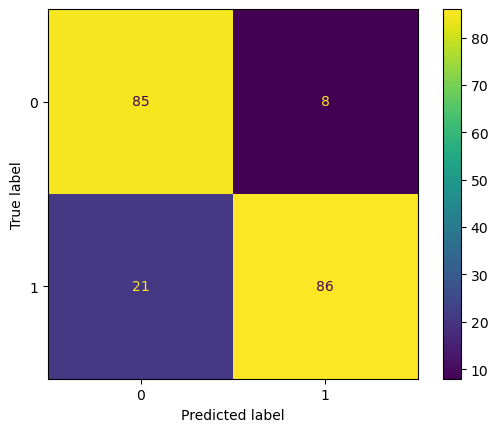

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels=[0,1]#substitua o seu aqui de acordo com o que houver na coluna que definiu como "y"
cm = confusion_matrix(y_test, y_pred) #se preferir use , normalize='all' nos parênteses
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

Portanto, a matriz de confusão fornece uma visão detalhada do desempenho do seu modelo em relação às duas classes e é frequentemente usada para calcular métricas como precisão, recall, F1-Score e outras métricas de avaliação.

Com base nesses valores, você pode avaliar o desempenho do seu modelo em relação a diferentes tipos de erros e acertos.Isso pode ser feito pelo classification report.

# Classification Report:

O relatório de classificação (classification report) fornece uma visão mais detalhada do desempenho do modelo, incluindo métricas como precisão, recall, pontuação F1 e suporte para cada classe.



## Como calcular ?

In [17]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



##Como interpretar?
Vou explicar linha por linha o que o código do classification_report faz:

Classification_report: Esta é a função do scikit-learn que gera um relatório de classificação. Ele leva duas entradas obrigatórias: y_test (valores verdadeiros das classes dos dados que vc separou para treino) e y_pred (valores previstos pelo modelo).

**Precisão (Precision)**: A precisão é a proporção de previsões positivas corretas em relação ao total de previsões positivas. É calculada como: $$TP / (TP + FP)$$ onde TP são os verdadeiros positivos e FP são os falsos positivos.

**Recall (Revocação ou Sensibilidade)**: O recall é a proporção de previsões positivas corretas em relação ao total de amostras verdadeiramente positivas. É calculado como: $$TP / (TP + FN)$$ onde TP são os verdadeiros positivos e FN são os falsos negativos.

**F1-Score**: O F1-Score é a média harmônica entre precisão e recall e fornece uma única métrica que leva em consideração tanto falsos positivos quanto falsos negativos. É calculado como 2 $×$ (Precisão * Recall) / (Precisão + Recall).

**Suporte (Support)**: O suporte é o número de amostras verdadeiras de cada classe no conjunto de teste.

A saída do classification_report é uma string formatada que exibe essas métricas para cada classe no problema de classificação. A saída inclui as métricas para cada classe, bem como a média ponderada dessas métricas, levando em consideração o número de amostras em cada classe.

# Comparando dois modelos

In [18]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Criar um conjunto de dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Treinar um modelo de KNN
knn_model = neighbors.KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Comparar os modelos usando classification_report
print("Classification Report - Regressão Logística:")
print(classification_report(y_test, y_pred_logistic))

print("Classification Report - KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report - Regressão Logística:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



Matriz de Confusão - Regressão Logística:


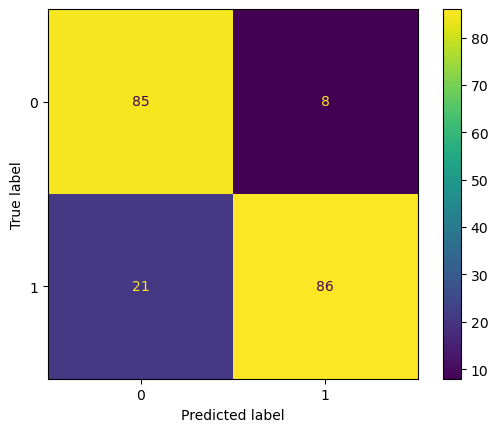

In [19]:
# Comparar os modelos usando confusion_matrix
#labels = [0, 1]  # Substitua pelos rótulos das suas classes

print("Matriz de Confusão - Regressão Logística:")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_logistic) #se preferir use , normalize='all' nos parênteses
cmd = ConfusionMatrixDisplay(cm, display_labels=logistic_model.classes_)
cmd.plot()

Matriz de Confusão - KNN:


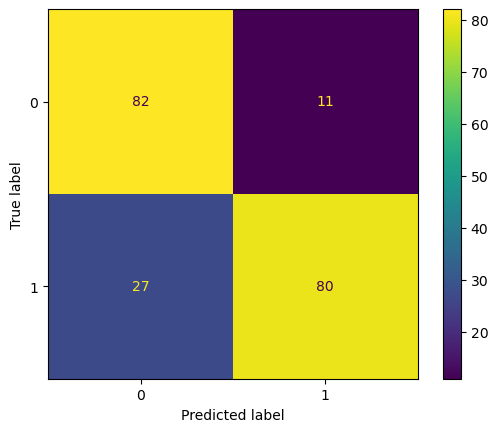

In [20]:
# Comparar os modelos usando confusion_matrix
#labels = [1,0]  # Substitua pelos rótulos das suas classes

print("Matriz de Confusão - KNN:")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_knn) #se preferir use , normalize='all' nos parênteses
cmd = ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_)
cmd.plot()